<a href="https://colab.research.google.com/github/Andrezmm12/Store-challenge-alura/blob/main/Copia_de_AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
!pip install pandas
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
from urllib.request import urlopen
import csv

urls = [url,url2,url3,url4]

#Funcion para leer un CSV desde URL
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
      lineas = respuesta.read().decode('utf-8').splitlines()
      lector = csv.DictReader(lineas)
      for fila in lector:
        datos.append(fila)
    return datos

# Analisis de facturacion
total_facturacion = 0

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    facturacion_tienda = 0

    for venta in datos_tienda:
      precio = float(venta['Precio']) # Solo se suma el precio
      facturacion_tienda += precio

    print(f"facturacion tienda {i+1}: ${facturacion_tienda:.2f}")
    total_facturacion += facturacion_tienda

# Mostrar facturacion total
print(f"\nFacturacion total de todas la tiendas: ${total_facturacion:.2f}")

facturacion tienda 1: $1150880400.00
facturacion tienda 2: $1116343500.00
facturacion tienda 3: $1098019600.00
facturacion tienda 4: $1038375700.00

Facturacion total de todas la tiendas: $4403619200.00


# 2. Ventas por categoría

In [ ]:
#Funcion para leer un CSV desde URL
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
      lineas = respuesta.read().decode('utf-8').splitlines()
      lector = csv.DictReader(lineas)
      for fila in lector:
        datos.append(fila)
    return datos

# Diccionario para almacenar las ventas por categoria
ventas_por_categoria = {}

# Procesar todas las tiendas
for i, url in enumerate(urls):
  datos_tienda = leer_csv(url)
  print(f"\nVentas por categoria en tienda {i+1}")

  # Diccionario para la tienda actual
  categorias_tienda = {}

  for venta in datos_tienda:
      categoria = venta['Categoría del Producto']
      precio = float(venta['Precio'])
      cantidad = int (venta['Cantidad de cuotas'])
      monto_venta = precio * cantidad

      #Agregar al diccionario de la tienda actual
      if categoria in categorias_tienda:
        categorias_tienda[categoria] += monto_venta
      else:
        categorias_tienda[categoria] = monto_venta

      # Agregar al diccionario general
      if categoria in ventas_por_categoria:
          ventas_por_categoria[categoria] += monto_venta
      else:
          ventas_por_categoria[categoria] = monto_venta

  # Mostrar resultado para esta tienda
  for categoria, monto in categorias_tienda.items():
    print(f"  {categoria}: ${monto:.2f}")

# Mostrar resultados totales
print("\nVentas totales por categoria (todas las tiendas):")
for categoria, monto in ventas_por_categoria.items():
  print(f"  {categoria}: ${monto:.2f}")

# Calcular el total general
total_general = sum(ventas_por_categoria.values())
print(f"\nTotal general de venras: ${total_general:.2f}")



Ventas por categoria en tienda 1
  Electrónicos: $1290390700.00
  Muebles: $582928200.00
  Juguetes: $49062800.00
  Electrodomésticos: $1032375600.00
  Artículos para el hogar: $38316800.00
  Deportes y diversión: $126883700.00
  Libros: $25769400.00
  Instrumentos musicales: $276990500.00

Ventas por categoria en tienda 2
  Muebles: $527332100.00
  Instrumentos musicales: $294448700.00
  Deportes y diversión: $81660600.00
  Electrónicos: $1286643600.00
  Artículos para el hogar: $42739700.00
  Juguetes: $46721200.00
  Electrodomésticos: $1026226300.00
  Libros: $31417000.00

Ventas por categoria en tienda 3
  Electrodomésticos: $1081380800.00
  Muebles: $555092500.00
  Instrumentos musicales: $250336000.00
  Deportes y diversión: $123399200.00
  Electrónicos: $1101334500.00
  Juguetes: $61190400.00
  Artículos para el hogar: $44724600.00
  Libros: $26358900.00

Ventas por categoria en tienda 4
  Electrodomésticos: $879089600.00
  Muebles: $556628000.00
  Deportes y diversión: $100062

# 3. Calificación promedio de la tienda


In [ ]:
#Funcion para leer un CSV desde URL
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
      lineas = respuesta.read().decode('utf-8').splitlines()
      lector = csv.DictReader(lineas)
      for fila in lector:
        datos.append(fila)
    return datos

# Calcular la calificacion promedio para cada tienda
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)

    # variables para calcular el promedio
    suma_calificaciones = 0
    cantidad_productos = 0

    for producto in datos_tienda:
      try:
        # Intentamos con diferentes posibles nombres de columnas
          if 'Calificación' in producto:
              calificacion = float(producto['Calificación'])
          elif 'Calificacion' in producto :
            calificacion = float(producto['Calificacion'])
          elif 'calificación' in producto :
            calificacion = float(producto['calificación'])
          elif 'calificacion' in producto :
            calificacion = float(producto['calificacion'])
          else:
            # Si no encontramos la columna, imprimimos las claves disponibles
            print(f"Claves disponibles en la tienda {i+1}:", producto.keys())
            raise KeyError("Nose encontro la columna de calificacion")

          suma_calificaciones += calificacion
          cantidad_productos += 1
      except (ValueError, KeyError) as e:
           if isinstance(e, KeyError):
               raise
           # Ignoramos valores que no se pueden convertir a float
           continue

    if cantidad_productos > 0:
        calificacion_promedio = suma_calificaciones / cantidad_productos
        print(f"Calificacion promedio de la tienda {i+1}: {calificacion_promedio:.2f}")

Calificacion promedio de la tienda 1: 3.98
Calificacion promedio de la tienda 2: 4.04
Calificacion promedio de la tienda 3: 4.05
Calificacion promedio de la tienda 4: 4.00


# 4. Productos más y menos vendidos

In [ ]:
from collections import defaultdict

def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
      lineas = respuesta.read().decode('utf-8').splitlines()
      lector = csv.DictReader(lineas)
      for fila in lector:
        datos.append(fila)
    return datos

#Funcion  para clacular Top 3 mas y menos dinero generado
def top_productos(datos_tienda, tienda_numero):
    ingreso_por_producto = defaultdict(float)

    for venta in datos_tienda:
      producto = venta['Producto']
      precio = float(venta['Precio'])
      # Ahora solo usamos el precio (no multiplicamos por cantidad de cuotas)
      ingreso_por_producto[producto] += precio

    # convertimos a lista ordenada
    productos_ordenados = sorted(ingreso_por_producto.items(), key=lambda x: x[1], reverse= True)

    top_mas_vendidos = productos_ordenados[:3]
    top_menos_vendidos = productos_ordenados[-3:]

    print(f"\nTienda {tienda_numero} - Top 3 productos que MAS dinero generaron:")
    for producto, ingreso in top_mas_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MENOS dinero generaron:")
    for producto, ingreso in top_menos_vendidos:
        print(f"  {producto}  - Ingresos: ${ingreso:.2f}")

# Recorrer todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    top_productos(datos_tienda, i)

# Leer todos los CSVs y agregar una columna 'Tienda'
df_total = pd.concat(
    [pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

#Aseguramos los tipos correctos
df_total['Precio'] = df_total['Precio'].astype(float)
df_total['Cantidad de cuotas'] = df_total['Cantidad de cuotas'].astype(int)

# el ingreso es simplemente el precio (no multiplicamos por cantidad de cuotas)
df_total['Ingreso'] = df_total['Precio']


# Agrupar por tienda y producto y sumar los ingresos
ventas = df_total.groupby(['Tienda', 'Producto'])[['Ingreso']].sum().reset_index()


# Funcion para mostrar los 3 productos que mas y menos finero generaron
def top_productos(tienda):
    data = ventas[ventas['Tienda'] == tienda]

    top_mas_vendidos = data.sort_values(by='Ingreso', ascending=False).head(3)
    top_menos_vendidos = data.sort_values(by='Ingreso', ascending=True).head(3)

    print(f"\n{tienda} - TOP 3  productos que MAS dinero generaron:")
    for _, fila in top_mas_vendidos.iterrows():
      print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

    print(f"\n{tienda} - TOP 3  productos que MENOS dinero generaron:")
    for _, fila in top_menos_vendidos.iterrows():
      print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

# Lista unica de tiendas
tiendas_unicas = ventas['Tienda'].unique()

# Recorrer todas las tiendas
for tienda in tiendas_unicas:
    top_productos(tienda)





Tienda 1 - Top 3 productos que MAS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8  - Ingresos: $696900.00
  Dinosaurio Rex  - Ingresos: $688900.00
  Cuerda para saltar  - Ingresos: $652800.00

Tienda 2 - Top 3 productos que MAS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar  - Ingresos: $856900.00
  Dinosaurio Rex  - Ingresos: $770300.00
  Cubo mágico 8x8  - Ingresos: $643600.00

Tienda 3 - Top 3 productos que MAS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar  - Ingresos: $853800.00
  Dinosauri

# 5. Envío promedio por tienda

In [ ]:
def calcular_envio_promedio(datos_tienda, tienda_numero):
    costos_envio = []

    for venta in datos_tienda:
      costo_envio = float(venta['Costo de envío'])
      costos_envio.append(costo_envio)

    promedio_envio = sum(costos_envio) / len(costos_envio) if costos_envio else 0

    print(f"Tienda {tienda_numero} - Envio promedio: ${promedio_envio:.2f}")

# procesar todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    calcular_envio_promedio(datos_tienda, i)

Tienda 1 - Envio promedio: $26018.61
Tienda 2 - Envio promedio: $25216.24
Tienda 3 - Envio promedio: $24805.68
Tienda 4 - Envio promedio: $23459.46


In [ ]:
# Asegurar que el costo de envio es numerico
df_total['Costo de envío'] = df_total['Costo de envío'].astype(float)

# Agrupar por tienda y calcular el promedio del costo de envio
envio_promedio = df_total.groupby('Tienda')['Costo de envio'].mean()

# Mostrar resultados
print("\nEnvio promedio por tienda")
for tienda, promedio in envio_promedio.items():
    print(f"{tienda}: ${promedio:.2f}")


Envio promedio por tienda
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


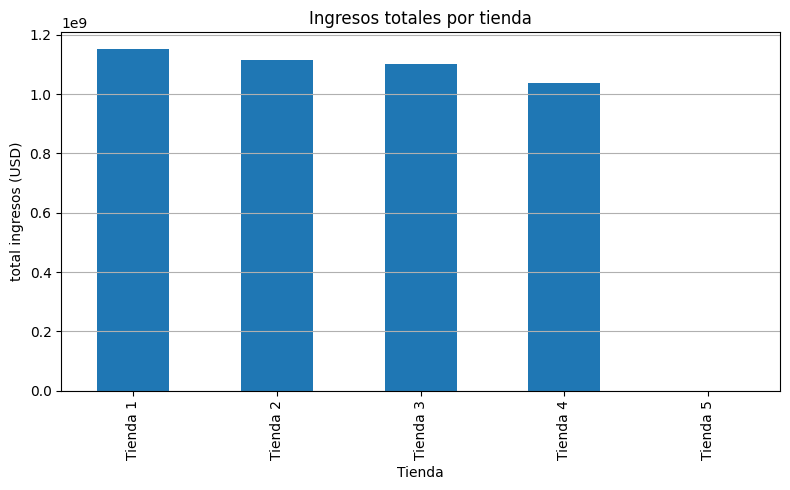

In [27]:
import matplotlib.pyplot as plt

df_total['Precio'] = df_total['Precio'].astype(float)

# Asegurar tipo correcto
df_total['Precio'] = df_total['Precio'].astype(float)

if 'Tienda' not in df_total.columns:
  df_total['Tienda'] = pd.Series(['Tienda ' + str(i // (len(df_total) // 4) + 1)
   for i in range(len(df_total))], index=df_total.index)

# Agrupar datos
ingresos_totales = df_total.groupby('Tienda')['Ingreso'].sum()
ingreso_promedio = df_total.groupby('tienda')['Ingreso'].mean()
distribucion_ingresos = ingresos_totales

# 1. Barra vertical: total de ingresos
plt.figure(figsize=(8,5))
ingresos_totales.plot(kind= 'bar')
plt.title('Ingresos totales por tienda')
plt.ylabel('total ingresos (USD)')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

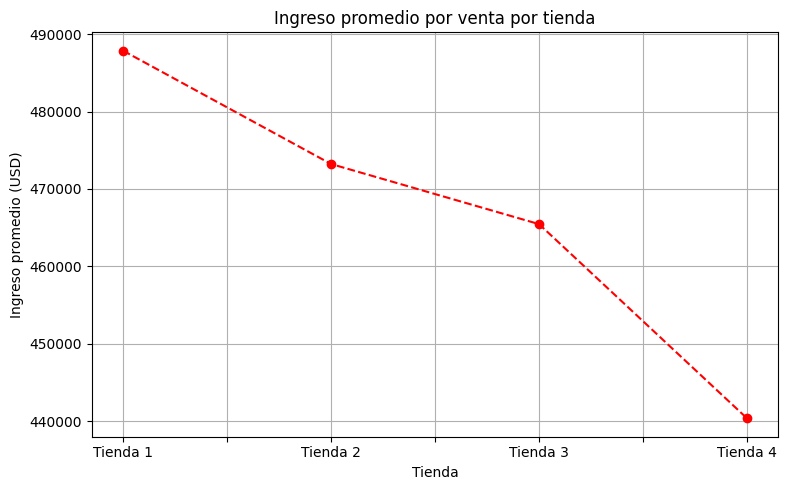

In [28]:
# 2. Linea: Promedio ingreso por venta
plt.figure(figsize=(8,5))
ingreso_promedio.plot(kind='line', marker='o', linestyle='--', color='red')
plt.title('Ingreso promedio por venta por tienda')
plt.ylabel('Ingreso promedio (USD)')
plt.xlabel('Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

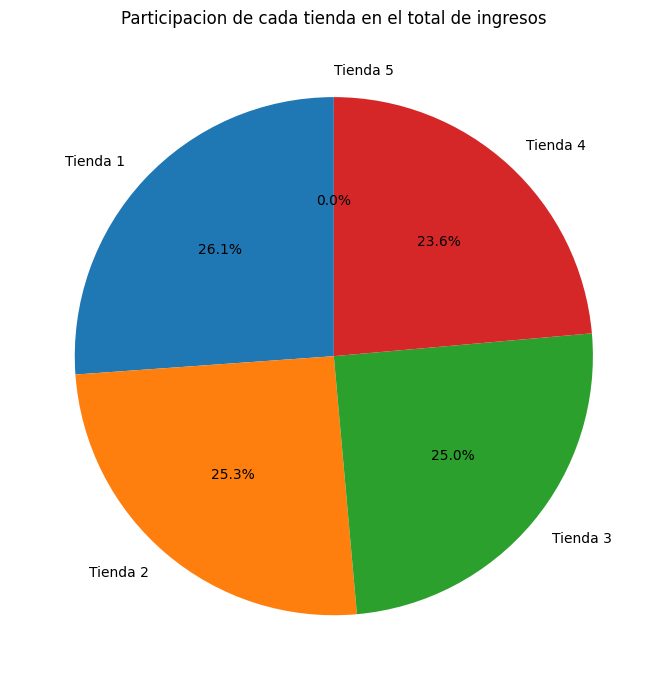

In [30]:
# 3. Pastel. distribucion del total
plt.figure(figsize=(7,7))
distribucion_ingresos.plot(kind= 'pie', autopct= '%1.1f%%', startangle= 90)
plt.title('Participacion de cada tienda en el total de ingresos')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
# Buen dia señor Juan, de acuerdo a la información solicitada de sus tiendas, le podre decir que viendo los resultados#
# obtenidos en estos analisis podemos decir que en todos los puntos solicitados que se analizaron la tienda que ha tenido #
# numeros mas bajos ha sido la numero 4, uno de los puntos a rescatar de esta tienda es su servicio ya que es la mejor #
# calificada por los clientes, podremos rescatar las mejores practivas y que se pongan en practica en las demas tiendas #
# para poder mantener el mejor servicio de una manera mas estandarizada. #